<a href="https://colab.research.google.com/github/VinayKumar189/intel-image-dataset/blob/master/intelimageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinaykumars","key":"8794e2862efb217b8b99bef7ce935ecd"}'}

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Dec 29 04:54 kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d puneet6060/intel-image-classification --force --unzip

 98% 341M/346M [00:01<00:00, 184MB/s]
100% 346M/346M [00:01<00:00, 188MB/s]


In [0]:
mkdir intelimage


In [0]:
cp -r seg_pred/ intelimage/

In [0]:
cd intelimage/

/content/intelimage


In [0]:
cp -r seg_pred/ test/

In [0]:
cd test/

/content/intelimage/test


In [0]:
cp -r seg_pred/* ./

In [0]:
rm -r seg_pred/

In [0]:
cd --content

/content


In [0]:
rm -r seg_pred/ seg_test/ seg_train/

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
path = Path('/content/intelimage/')

In [0]:
path.ls()

[PosixPath('/content/intelimage/train'),
 PosixPath('/content/intelimage/valid'),
 PosixPath('/content/intelimage/test')]

In [0]:
np.random.seed(2)
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, test = 'pred', ds_tfms=tfms, size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
street,street,street,street,street
Path: /content/intelimage;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
street,street,street,street,street
Path: /content/intelimage;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /content/intelimage

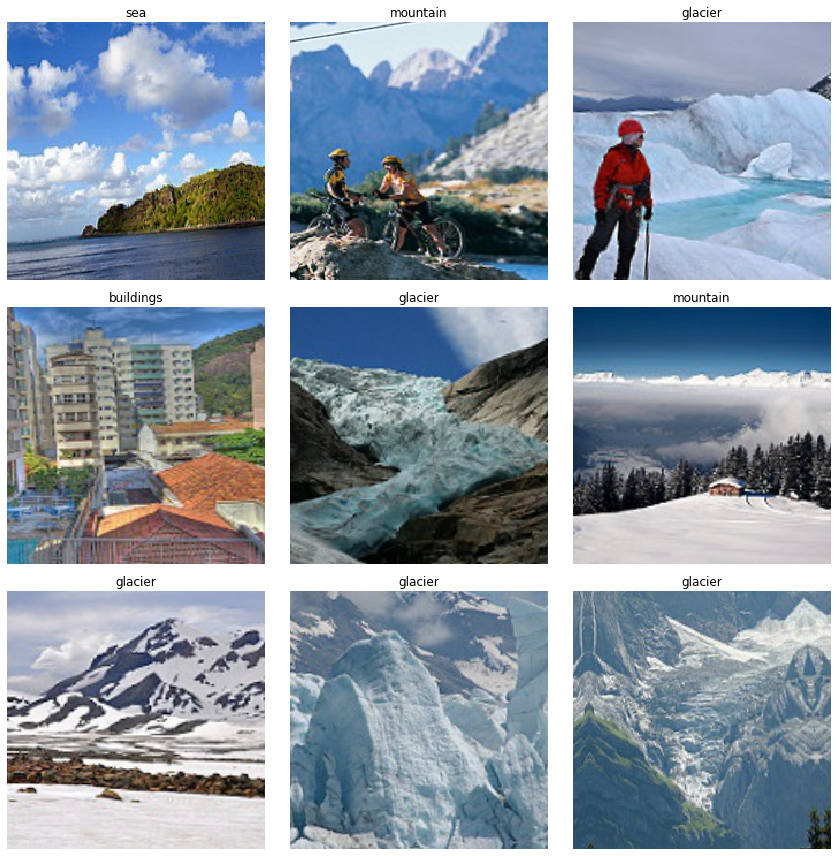

In [0]:
data.show_batch(rows = 3)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = [error_rate, accuracy])
learn.fit_one_cycle(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 50.4MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.442751,0.299937,0.106000,0.894000,1:20:29
1,0.298930,0.221051,0.084333,0.915667,1:20:33


In [0]:
learn.save('resnet34-stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

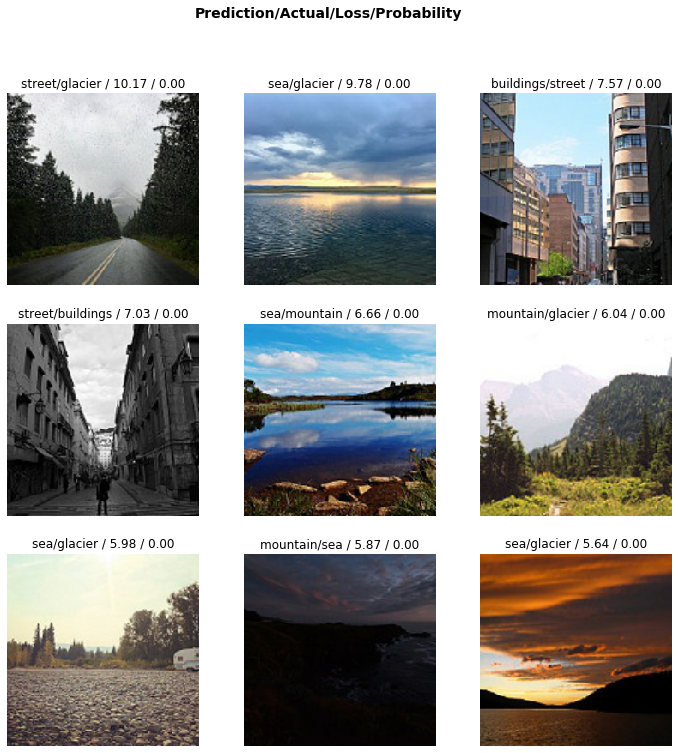

In [0]:
interp.plot_top_losses(9)

In [0]:
interp.most_confused(min_val=2)

[('glacier', 'mountain', 74),
 ('mountain', 'glacier', 64),
 ('buildings', 'street', 36),
 ('street', 'buildings', 27),
 ('glacier', 'sea', 14),
 ('mountain', 'sea', 6),
 ('sea', 'glacier', 5),
 ('glacier', 'forest', 4),
 ('mountain', 'forest', 4),
 ('sea', 'mountain', 4),
 ('buildings', 'sea', 3),
 ('glacier', 'buildings', 2),
 ('glacier', 'street', 2)]

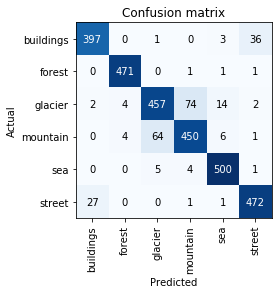

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.279041,0.203623,0.072333,0.927667,1:55:14


In [0]:
learn.load('resnet34-stage-1')
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


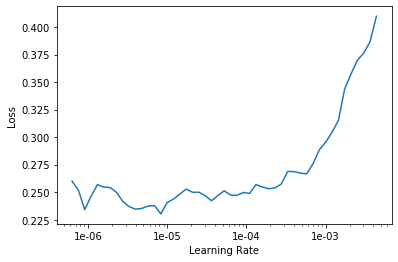

In [0]:
learn.recorder.plot()